In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('202406-citibike-tripdata_1.csv')
df2=pd.read_csv('dublin-bikes_station_status_062024.csv')
df3=pd.read_csv('LondonBikeJourneyAug2023.csv')

In [3]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A38B171B6C31691A,electric_bike,2024-06-12 17:47:23.952,2024-06-12 17:50:27.312,E 89 St & 3 Ave,7265.10,1 Ave & E 94 St,7286.05,40.780499,-73.952185,40.781721,-73.945940,member
1,77E13C9D6559EA56,electric_bike,2024-06-04 16:48:42.876,2024-06-04 17:01:46.672,Pier 40 - Hudson River Park,5696.03,W 25 St & 9 Ave,6339.06,40.728060,-74.011184,40.747833,-74.000572,member
2,EA6418AD826D19D9,electric_bike,2024-06-01 13:36:28.502,2024-06-01 13:52:55.912,W 44 St & 5 Ave,6551.02,E 75 St & 3 Ave,6991.12,40.754621,-73.980641,40.771129,-73.957723,member
3,121CF2548FB65A29,classic_bike,2024-06-01 03:12:09.636,2024-06-01 03:16:29.531,Graham Ave & Withers St,5403.04,Meserole Ave & Manhattan Ave,5666.04,40.716981,-73.944859,40.727086,-73.952991,member
4,E6BE7FD2809649D6,electric_bike,2024-06-08 13:14:31.197,2024-06-08 13:24:09.858,E 9 St & Ave C,5616.01,Cleveland Pl & Spring St,5492.05,40.725241,-73.977735,40.722104,-73.997249,member


In [4]:
df2.head()

,system_id,last_reported,station_id,num_bikes_available,num_docks_available,is_installed,is_renting,is_returning,name,short_name,address,lat,lon,region_id,capacity
0,dublin_bikes,2024-06-01 00:05:00,101,7,23,True,True,True,KING STREET NORTH,NaN,King Street North,53.350292,-6.273507,NaN,30
1,dublin_bikes,2024-06-01 00:05:00,102,16,24,True,True,True,WESTERN WAY,NaN,Western Way,53.354930,-6.269425,NaN,40
2,dublin_bikes,2024-06-01 00:05:00,106,2,38,True,True,True,RATHDOWN ROAD,NaN,Rathdown Road,53.358930,-6.280337,NaN,40
3,dublin_bikes,2024-06-01 00:05:00,107,6,34,True,True,True,CHARLEVILLE ROAD,NaN,Charleville Road,53.359158,-6.281866,NaN,40
4,dublin_bikes,2024-06-01 00:05:00,11,1,29,True,True,True,EARLSFORT TERRACE,NaN,Earlsfort Terrace,53.334293,-6.258503,NaN,30


In [5]:
df3.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786


# Data Preparation & Visualisation Tasks

## Task 2: Exploratory Data Analysis (EDA)

In [6]:
# Visualizing data and understanding the structure
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1000000 non-null  object 
 1   rideable_type       1000000 non-null  object 
 2   started_at          1000000 non-null  object 
 3   ended_at            1000000 non-null  object 
 4   start_station_name  999432 non-null   object 
 5   start_station_id    999432 non-null   object 
 6   end_station_name    994270 non-null   object 
 7   end_station_id      993929 non-null   object 
 8   start_lat           1000000 non-null  float64
 9   start_lng           1000000 non-null  float64
 10  end_lat             999366 non-null   float64
 11  end_lng             999366 non-null   float64
 12  member_casual       1000000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 99.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315747 entries, 0 to

In [7]:
# Checking for missing data
print("Missing Data in df1:")
df1.isnull().sum()

Missing Data in df1:


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,568
start_station_id,568
end_station_name,5730
end_station_id,6071
start_lat,0
start_lng,0


In [8]:

print("Missing Data in df2:")
df2.isnull().sum()



Missing Data in df2:


,0
system_id,0
last_reported,0
station_id,0
num_bikes_available,0
num_docks_available,0
is_installed,0
is_renting,0
is_returning,0
name,0
short_name,315747


In [9]:
print("Missing Data in df3:")
df3.isnull().sum()

Missing Data in df3:


,0
Number,0
Start date,0
Start station number,0
Start station,0
End date,0
End station number,0
End station,0
Bike number,0
Bike model,0
Total duration,0


## Task 3: Data Cleaning and Structuring

In [10]:
# Filling missing values in df1
df1['start_station_name'].fillna("Unknown", inplace=True)
df1['start_station_id'].fillna("Unknown", inplace=True)
df1['end_station_name'].fillna("Unknown", inplace=True)
df1['end_station_id'].fillna("Unknown", inplace=True)
df1['end_lat'].fillna(df1['start_lat'].mean(), inplace=True)
df1['end_lng'].fillna(df1['start_lng'].mean(), inplace=True)

In [11]:
print("Missing Data in df1:")
df1.isnull().sum()

Missing Data in df1:


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


In [12]:
# Imputing missing values in df2 for numeric columns
df2['short_name'].fillna("Unknown", inplace=True)
df2['region_id'].fillna("Unknown", inplace=True)

In [13]:
print("Missing Data in df2:")
df2.isnull().sum()

Missing Data in df2:


,0
system_id,0
last_reported,0
station_id,0
num_bikes_available,0
num_docks_available,0
is_installed,0
is_renting,0
is_returning,0
name,0
short_name,0


In [14]:
# Cleaning df3 (ensuring date columns are datetime)
df3['Start date'] = pd.to_datetime(df3['Start date'])
df3['End date'] = pd.to_datetime(df3['End date'])

## Task 4: Data Enrichment & Feature Engineering

In [15]:
# Adding duration in seconds for df1
df1['duration_sec'] = (pd.to_datetime(df1['ended_at']) - pd.to_datetime(df1['started_at'])).dt.total_seconds()

# Adding a weekday column to analyze trends by day
df1['weekday'] = pd.to_datetime(df1['started_at']).dt.day_name()
df2['weekday'] = pd.to_datetime(df2['last_reported']).dt.day_name()

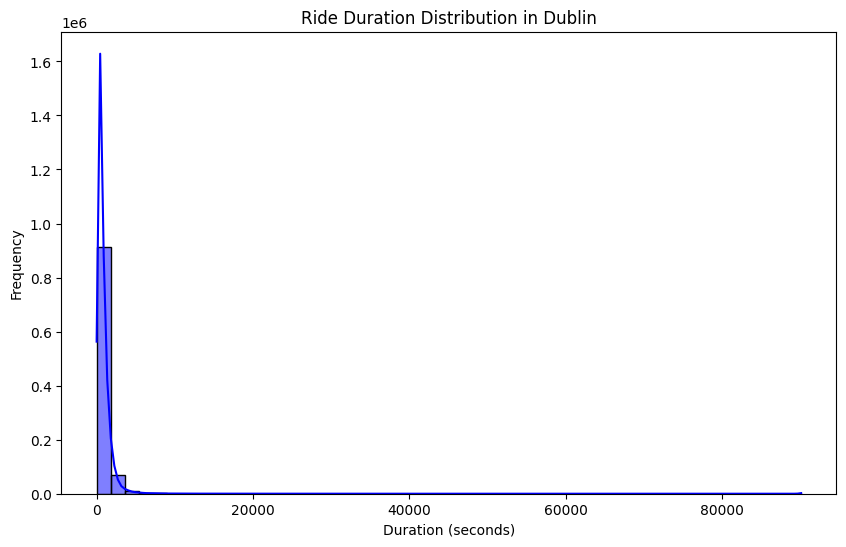

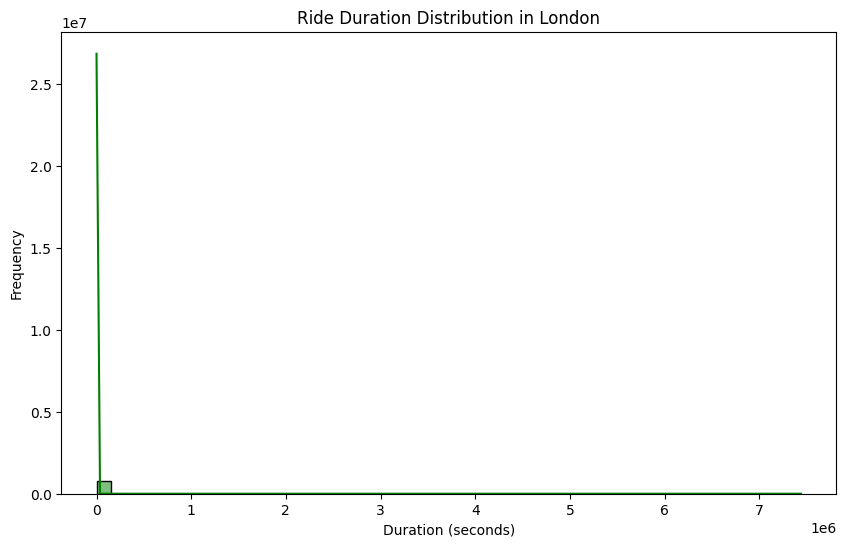

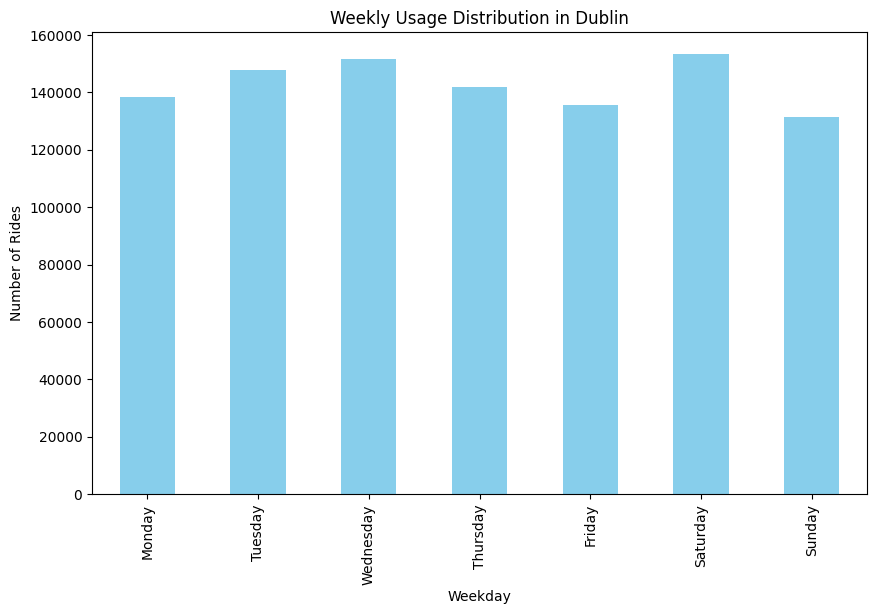

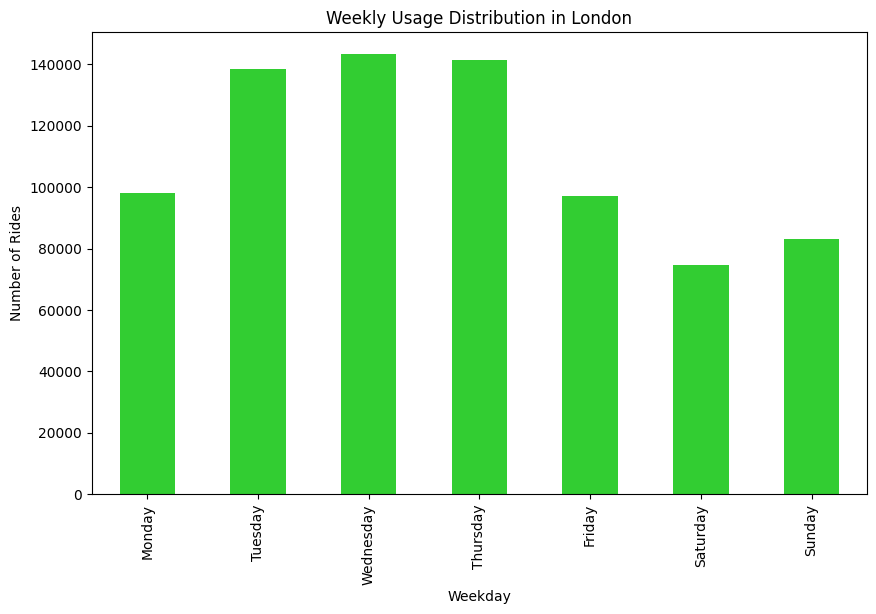

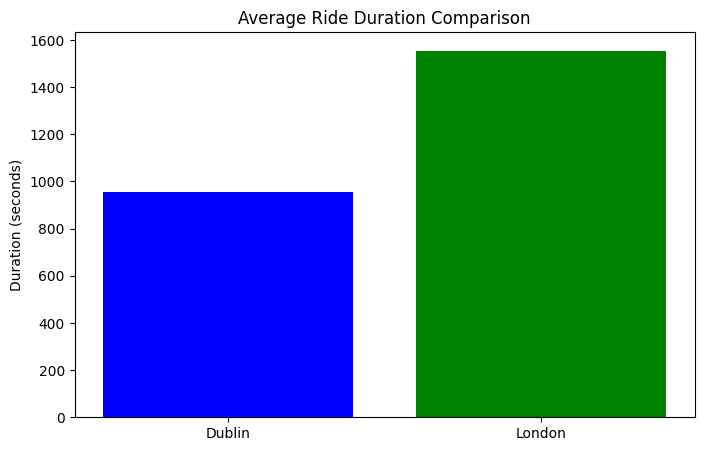

In [16]:
# Visualize Ride Duration Distribution for Dublin (df1)
plt.figure(figsize=(10, 6))
sns.histplot(df1['duration_sec'], bins=50, kde=True, color="blue")
plt.title("Ride Duration Distribution in Dublin")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

# Visualize Ride Duration Distribution for London (df3)
df3['duration_sec'] = df3['Total duration (ms)'] / 1000  # Convert milliseconds to seconds
plt.figure(figsize=(10, 6))
sns.histplot(df3['duration_sec'], bins=50, kde=True, color="green")
plt.title("Ride Duration Distribution in London")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

# Weekly Usage Comparison: Dublin
df1_weekday = df1['weekday'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
plt.figure(figsize=(10, 6))
df1_weekday.plot(kind="bar", color="skyblue")
plt.title("Weekly Usage Distribution in Dublin")
plt.xlabel("Weekday")
plt.ylabel("Number of Rides")
plt.show()

# Weekly Usage Comparison: London
df3['weekday'] = df3['Start date'].dt.day_name()
df3_weekday = df3['weekday'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
plt.figure(figsize=(10, 6))
df3_weekday.plot(kind="bar", color="limegreen")
plt.title("Weekly Usage Distribution in London")
plt.xlabel("Weekday")
plt.ylabel("Number of Rides")
plt.show()



# Comparison of Average Ride Durations
avg_duration_dublin = df1['duration_sec'].mean()
avg_duration_london = df3['duration_sec'].mean()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(["Dublin", "London"], [avg_duration_dublin, avg_duration_london], color=["blue", "green"])
plt.title("Average Ride Duration Comparison")
plt.ylabel("Duration (seconds)")
plt.show()


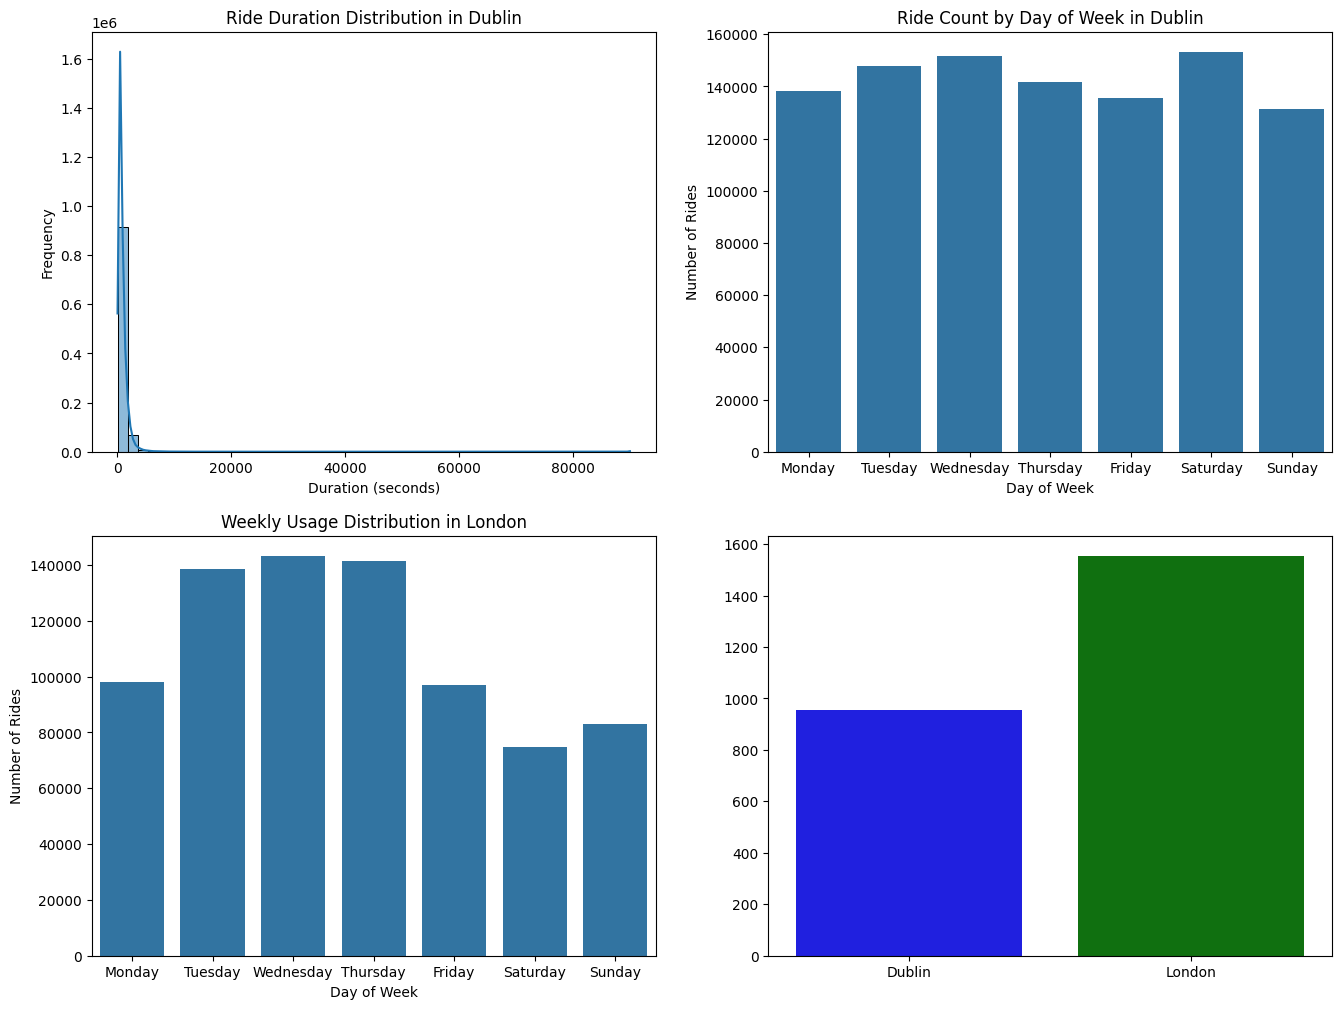

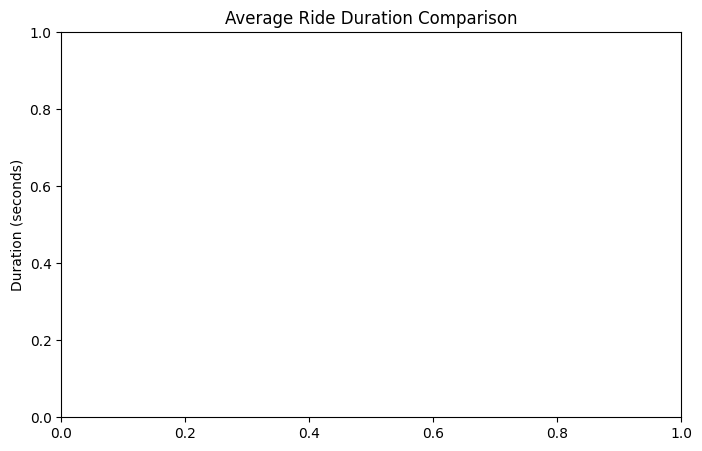

<Figure size 640x480 with 0 Axes>

In [17]:
# Dashboard with Matplotlib and Seaborn
# Define the dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Ride Duration Distribution for Dublin
duration_plot = sns.histplot(df1['duration_sec'], bins=50, kde=True, ax=axes[0, 0])
duration_plot.set_title("Ride Duration Distribution in Dublin")
duration_plot.set_xlabel("Duration (seconds)")
duration_plot.set_ylabel("Frequency")

# Ride Count by Day of Week for Dublin
weekday_count = df1['weekday'].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
weekday_plot = sns.barplot(x=weekday_count.index, y=weekday_count.values, ax=axes[0, 1])
weekday_plot.set_title("Ride Count by Day of Week in Dublin")
weekday_plot.set_xlabel("Day of Week")
weekday_plot.set_ylabel("Number of Rides")

# Weekly Usage Comparison: London
df3['duration_sec'] = df3['Total duration (ms)'] / 1000  # Convert milliseconds to seconds
df3['weekday'] = df3['Start date'].dt.day_name()
df3_weekday = df3['weekday'].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
weekday_london_plot = sns.barplot(x=df3_weekday.index, y=df3_weekday.values,ax=axes[1, 0])
weekday_london_plot.set_title("Weekly Usage Distribution in London")
weekday_london_plot.set_xlabel("Day of Week")
weekday_london_plot.set_ylabel("Number of Rides")

# Comparison of Average Ride Durations
avg_duration_dublin = df1['duration_sec'].mean()
avg_duration_london = df3['duration_sec'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=["Dublin", "London"], y=[avg_duration_dublin, avg_duration_london], palette=["blue", "green"],ax=axes[1, 1])
plt.title("Average Ride Duration Comparison")
plt.ylabel("Duration (seconds)")
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
# Save cleaned datasets for further analysis
df1.to_csv("cleaned_df1.csv", index=False)
df2.to_csv("cleaned_df2.csv", index=False)
df3.to_csv("cleaned_df3.csv", index=False)

# Statistics for Data Analytics Tasks

## Inferential Statistics

In [19]:
# Descriptive statistics
print("Descriptive Statistics for Dublin Cycling Data:")
df1.describe()


Descriptive Statistics for Dublin Cycling Data:


,start_lat,start_lng,end_lat,end_lng,duration_sec
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,40.738169,-73.970326,40.737866,-73.969774,955.191287
std,0.042433,0.029647,0.042796,0.029558,2840.081134
min,40.633278,-74.026969,40.560000,-74.110000,6.385000
25%,40.711674,-73.991876,40.712477,-73.991475,339.641500
50%,40.737059,-73.977928,40.735877,-73.976485,598.256000
75%,40.763267,-73.953526,40.762009,-73.953242,1047.382000
max,40.886407,-73.824406,40.930000,-73.720000,90094.691000


In [20]:
#Descriptive Statistics for Dublin Cycling Data:
df3.describe()

,Number,Start date,Start station number,End date,End station number,Bike number,Total duration (ms),duration_sec
count,7.765270e+05,776527,7.765270e+05,776527,7.765270e+05,776527.000000,7.765270e+05,7.765270e+05
mean,1.332250e+08,2023-08-16 14:22:01.523398144,1.048377e+05,2023-08-16 14:47:56.501036032,1.044439e+05,49568.888425,1.554986e+06,1.554986e+03
min,1.328252e+08,2023-08-01 00:00:00,9.590000e+02,2023-08-01 00:04:00,9.590000e+02,2.000000,1.307000e+03,1.307000e+00
25%,1.330252e+08,2023-08-09 09:35:00,1.126000e+03,2023-08-09 09:54:00,1.123000e+03,50563.000000,4.854690e+05,4.854690e+02
50%,1.332248e+08,2023-08-16 16:06:00,3.467000e+03,2023-08-16 16:33:00,3.465000e+03,54625.000000,8.387700e+05,8.387700e+02
75%,1.334248e+08,2023-08-23 18:36:00,2.001800e+05,2023-08-23 18:57:00,2.001810e+05,58168.000000,1.392228e+06,1.392229e+03
max,1.336251e+08,2023-08-31 23:59:00,1.100444e+06,2023-11-09 20:19:00,1.100444e+06,61201.000000,7.441908e+09,7.441908e+06
std,2.307174e+05,NaN,1.277670e+05,NaN,1.278823e+05,13092.003305,1.729002e+07,1.729002e+04


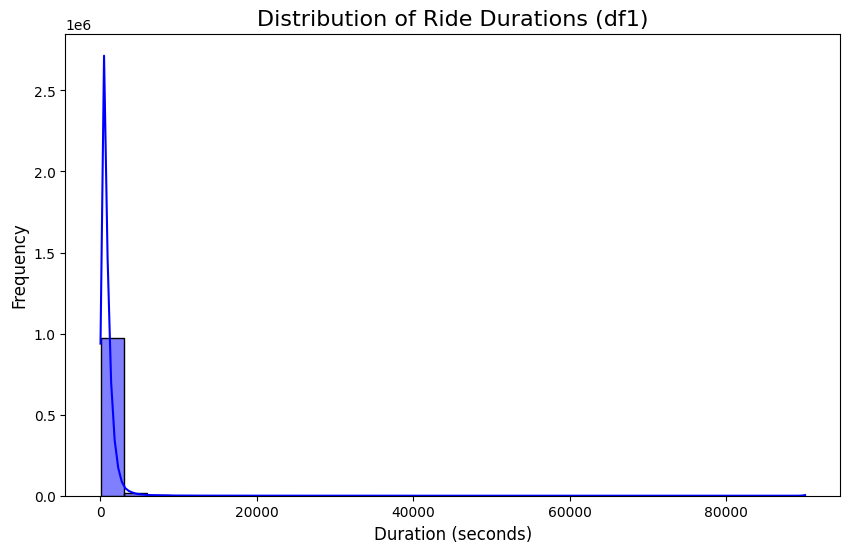

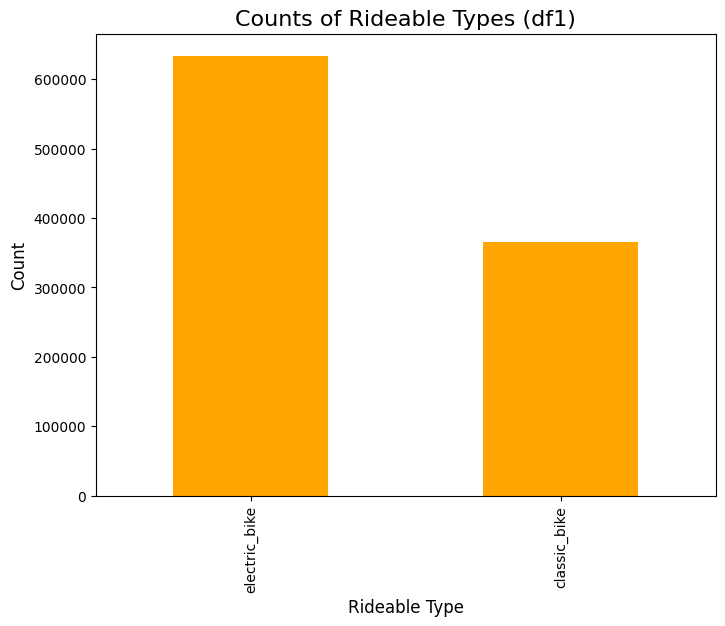

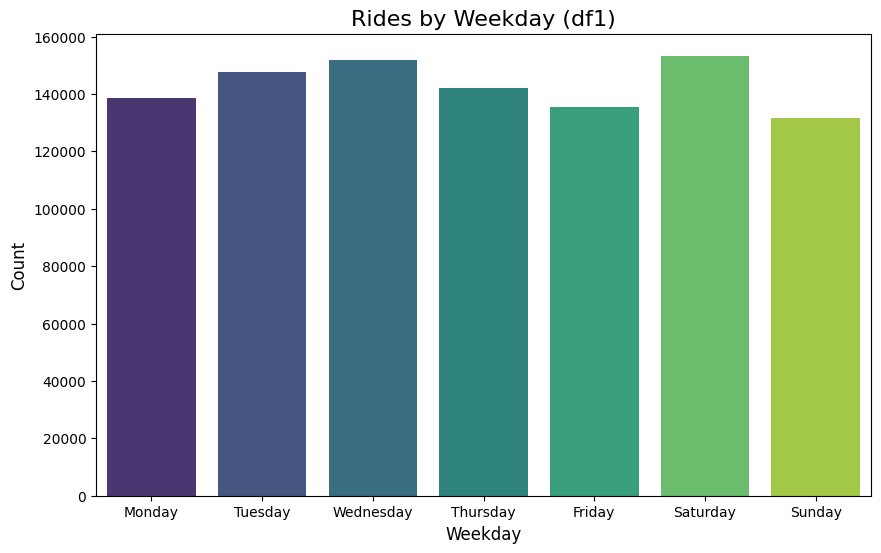

In [21]:
# 1. Distribution of ride durations
plt.figure(figsize=(10, 6))
sns.histplot(df1['duration_sec'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ride Durations (df1)', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Counts of rideable types
plt.figure(figsize=(8, 6))
df1['rideable_type'].value_counts().plot(kind='bar', color='orange')
plt.title('Counts of Rideable Types (df1)', fontsize=16)
plt.xlabel('Rideable Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 3. Rides by weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Rides by Weekday (df1)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

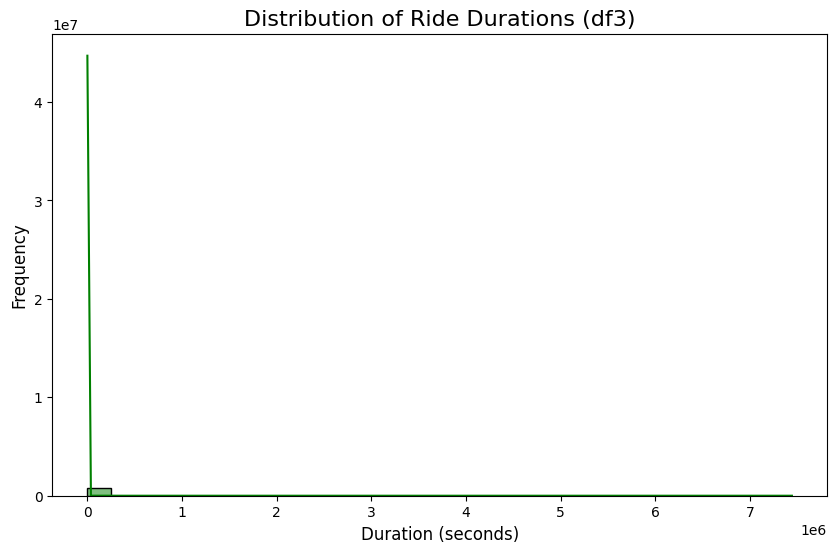

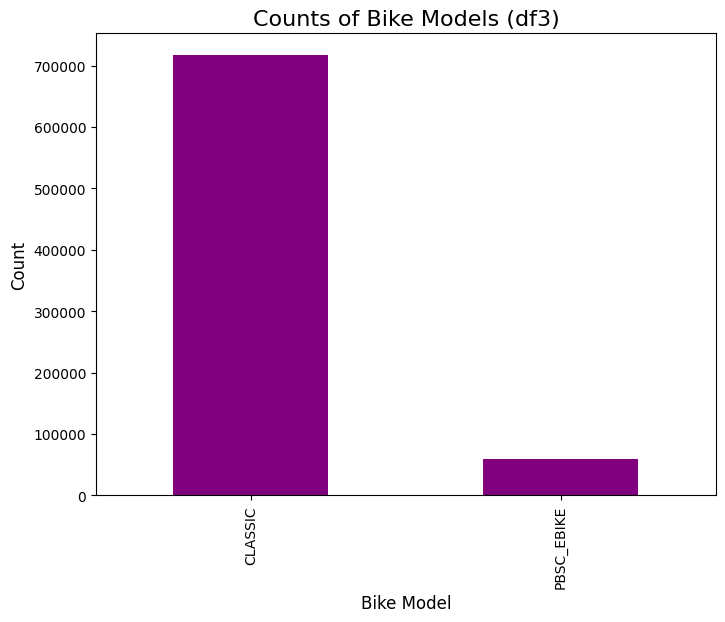

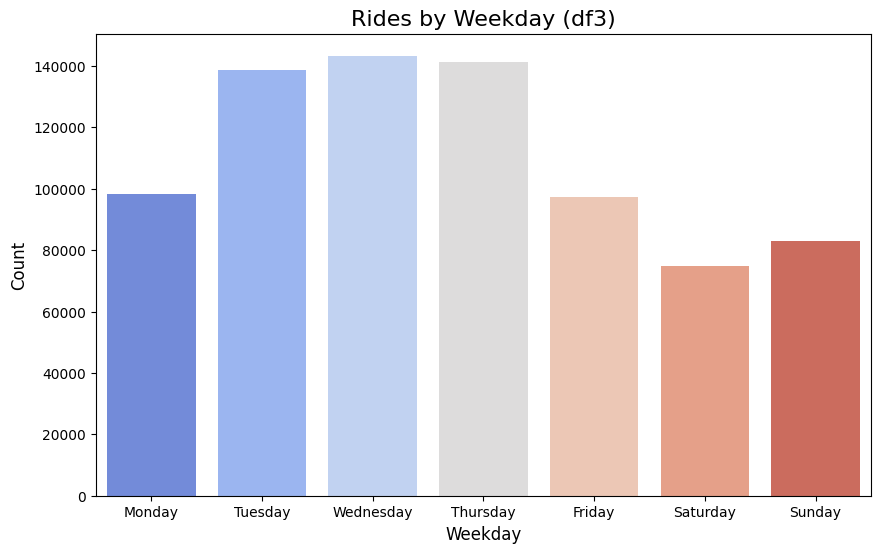

In [22]:
# 4. Distribution of ride durations (df3)
plt.figure(figsize=(10, 6))
sns.histplot(df3['duration_sec'], bins=30, kde=True, color='green')
plt.title('Distribution of Ride Durations (df3)', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 5. Counts of bike models
plt.figure(figsize=(8, 6))
df3['Bike model'].value_counts().plot(kind='bar', color='purple')
plt.title('Counts of Bike Models (df3)', fontsize=16)
plt.xlabel('Bike Model', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 6. Rides by weekday (df3)
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title('Rides by Weekday (df3)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Hypothesis Tests

In [23]:
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.anova import AnovaRM
from scipy.stats import chi2_contingency, ttest_ind, wilcoxon, kruskal

In [24]:
# 1. T-test for difference in mean ride durations
t_stat, p_val = ttest_ind(df1['duration_sec'].dropna(), df3['duration_sec'].dropna())
print(f"T-test Results: t-statistic={t_stat}, p-value={p_val}")

T-test Results: t-statistic=-34.10279043127478, p-value=8.114039569320757e-255


In [25]:
# 2. Wilcoxon Test
wilcoxon_stat, wilcoxon_p = wilcoxon(df1['duration_sec'].dropna()[:1000], df3['duration_sec'].dropna()[:1000])  # Limited for performance
print(f"Wilcoxon Test Results: statistic={wilcoxon_stat}, p-value={wilcoxon_p}")

Wilcoxon Test Results: statistic=176541.0, p-value=7.124556738694404e-16


In [26]:
# 3. Chi-squared test for weekday usage
contingency_table = pd.crosstab(df1['weekday'], df3['weekday'])
chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Squared Test Results: chi2_statistic={chi2_stat}, p-value={chi2_p}")

Chi-Squared Test Results: chi2_statistic=113.24858572936357, p-value=6.442047691528802e-10


In [27]:
# 4. Kruskal-Wallis Test
kruskal_stat, kruskal_p = kruskal(df1['duration_sec'].dropna()[:1000], df3['duration_sec'].dropna()[:1000])
print(f"Kruskal-Wallis Test Results: statistic={kruskal_stat}, p-value={kruskal_p}")

Kruskal-Wallis Test Results: statistic=74.61574506495587, p-value=5.7185307132468565e-18


In [28]:
# 5. Z-test for proportion of rides on weekdays vs weekends
weekday_rides = df1['weekday'].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]).sum()
weekend_rides = df1['weekday'].isin(["Saturday", "Sunday"]).sum()
z_stat, z_p = ztest([weekday_rides, weekend_rides])
print(f"Z-Test Results: z-statistic={z_stat}, p-value={z_p}")

Z-Test Results: z-statistic=2.3231286037532466, p-value=0.020172244779832187


In [29]:
df1_clean=pd.read_csv('cleaned_df1.csv')
df2_clean=pd.read_csv('cleaned_df2.csv')
df3_clean=pd.read_csv('cleaned_df3.csv')

In [30]:
df1_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_sec,weekday
0,A38B171B6C31691A,electric_bike,2024-06-12 17:47:23.952,2024-06-12 17:50:27.312,E 89 St & 3 Ave,7265.10,1 Ave & E 94 St,7286.05,40.780499,-73.952185,40.781721,-73.945940,member,183.360,Wednesday
1,77E13C9D6559EA56,electric_bike,2024-06-04 16:48:42.876,2024-06-04 17:01:46.672,Pier 40 - Hudson River Park,5696.03,W 25 St & 9 Ave,6339.06,40.728060,-74.011184,40.747833,-74.000572,member,783.796,Tuesday
2,EA6418AD826D19D9,electric_bike,2024-06-01 13:36:28.502,2024-06-01 13:52:55.912,W 44 St & 5 Ave,6551.02,E 75 St & 3 Ave,6991.12,40.754621,-73.980641,40.771129,-73.957723,member,987.410,Saturday
3,121CF2548FB65A29,classic_bike,2024-06-01 03:12:09.636,2024-06-01 03:16:29.531,Graham Ave & Withers St,5403.04,Meserole Ave & Manhattan Ave,5666.04,40.716981,-73.944859,40.727086,-73.952991,member,259.895,Saturday
4,E6BE7FD2809649D6,electric_bike,2024-06-08 13:14:31.197,2024-06-08 13:24:09.858,E 9 St & Ave C,5616.01,Cleveland Pl & Spring St,5492.05,40.725241,-73.977735,40.722104,-73.997249,member,578.661,Saturday


In [31]:
df2_clean.head()

,system_id,last_reported,station_id,num_bikes_available,num_docks_available,is_installed,is_renting,is_returning,name,short_name,address,lat,lon,region_id,capacity,weekday
0,dublin_bikes,2024-06-01 00:05:00,101,7,23,True,True,True,KING STREET NORTH,Unknown,King Street North,53.350292,-6.273507,Unknown,30,Saturday
1,dublin_bikes,2024-06-01 00:05:00,102,16,24,True,True,True,WESTERN WAY,Unknown,Western Way,53.354930,-6.269425,Unknown,40,Saturday
2,dublin_bikes,2024-06-01 00:05:00,106,2,38,True,True,True,RATHDOWN ROAD,Unknown,Rathdown Road,53.358930,-6.280337,Unknown,40,Saturday
3,dublin_bikes,2024-06-01 00:05:00,107,6,34,True,True,True,CHARLEVILLE ROAD,Unknown,Charleville Road,53.359158,-6.281866,Unknown,40,Saturday
4,dublin_bikes,2024-06-01 00:05:00,11,1,29,True,True,True,EARLSFORT TERRACE,Unknown,Earlsfort Terrace,53.334293,-6.258503,Unknown,30,Saturday


In [32]:
df3_clean.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),duration_sec,weekday
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,1006.663,Tuesday
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,1007.128,Tuesday
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",2023-08-01 00:11:00,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,666.395,Tuesday
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",2023-08-01 00:12:00,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,713.059,Tuesday
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",2023-08-01 00:17:00,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,963.786,Tuesday


In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1000000 non-null  object 
 1   rideable_type       1000000 non-null  object 
 2   started_at          1000000 non-null  object 
 3   ended_at            1000000 non-null  object 
 4   start_station_name  1000000 non-null  object 
 5   start_station_id    1000000 non-null  object 
 6   end_station_name    1000000 non-null  object 
 7   end_station_id      1000000 non-null  object 
 8   start_lat           1000000 non-null  float64
 9   start_lng           1000000 non-null  float64
 10  end_lat             1000000 non-null  float64
 11  end_lng             1000000 non-null  float64
 12  member_casual       1000000 non-null  object 
 13  duration_sec        1000000 non-null  float64
 14  weekday             1000000 non-null  object 
dtypes: float64(5), o

In [34]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Number                776527 non-null  int64  
 1   Start date            776527 non-null  object 
 2   Start station number  776527 non-null  int64  
 3   Start station         776527 non-null  object 
 4   End date              776527 non-null  object 
 5   End station number    776527 non-null  int64  
 6   End station           776527 non-null  object 
 7   Bike number           776527 non-null  int64  
 8   Bike model            776527 non-null  object 
 9   Total duration        776527 non-null  object 
 10  Total duration (ms)   776527 non-null  int64  
 11  duration_sec          776527 non-null  float64
 12  weekday               776527 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 77.0+ MB


# Machine Learning Tasks

## Forecasting: Dublin and London weekly trends

In [35]:
# Importing libraries for forecasting and sentiment analysis
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
import warnings

warnings.filterwarnings("ignore")

In [36]:
# Aggregating data by weekday
dublin_weekly = df1_clean.groupby('weekday')['duration_sec'].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

london_weekly = df3_clean.groupby('weekday')['duration_sec'].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Converting weekday trends into a time series format for forecasting
dublin_weekly_series = pd.Series(dublin_weekly.values, index=pd.date_range(start="2024-06-01", periods=7, freq='D'))
london_weekly_series = pd.Series(london_weekly.values, index=pd.date_range(start="2024-06-01", periods=7, freq='D'))

# Applying Exponential Smoothing for forecasting without seasonal component
dublin_model = ExponentialSmoothing(dublin_weekly_series, trend="additive").fit()
london_model = ExponentialSmoothing(london_weekly_series, trend="additive").fit()

# Forecasting future values
dublin_forecast = dublin_model.forecast(steps=10)
london_forecast = london_model.forecast(steps=10)

print("Dublin Forecast:", dublin_forecast)
print("London Forecast:", london_forecast)

Dublin Forecast: 2024-06-08    1.581524e+08
2024-06-09    1.627821e+08
2024-06-10    1.674117e+08
2024-06-11    1.720414e+08
2024-06-12    1.766711e+08
2024-06-13    1.813007e+08
2024-06-14    1.859304e+08
2024-06-15    1.905601e+08
2024-06-16    1.951897e+08
2024-06-17    1.998194e+08
Freq: D, dtype: float64
London Forecast: 2024-06-08    1.880135e+08
2024-06-09    1.988957e+08
2024-06-10    2.097780e+08
2024-06-11    2.206602e+08
2024-06-12    2.315424e+08
2024-06-13    2.424247e+08
2024-06-14    2.533069e+08
2024-06-15    2.641892e+08
2024-06-16    2.750714e+08
2024-06-17    2.859537e+08
Freq: D, dtype: float64


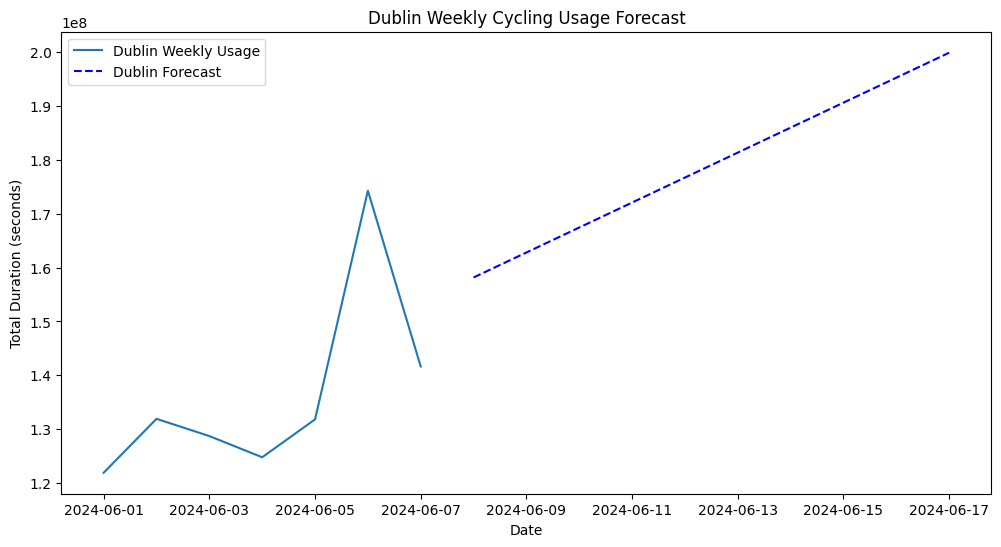

In [37]:
# Plotting forecasts
plt.figure(figsize=(12, 6))
plt.plot(dublin_weekly_series, label="Dublin Weekly Usage")
plt.plot(dublin_forecast, label="Dublin Forecast", linestyle="--", color="blue")
plt.title("Dublin Weekly Cycling Usage Forecast")
plt.xlabel("Date")
plt.ylabel("Total Duration (seconds)")
plt.legend()
plt.show()

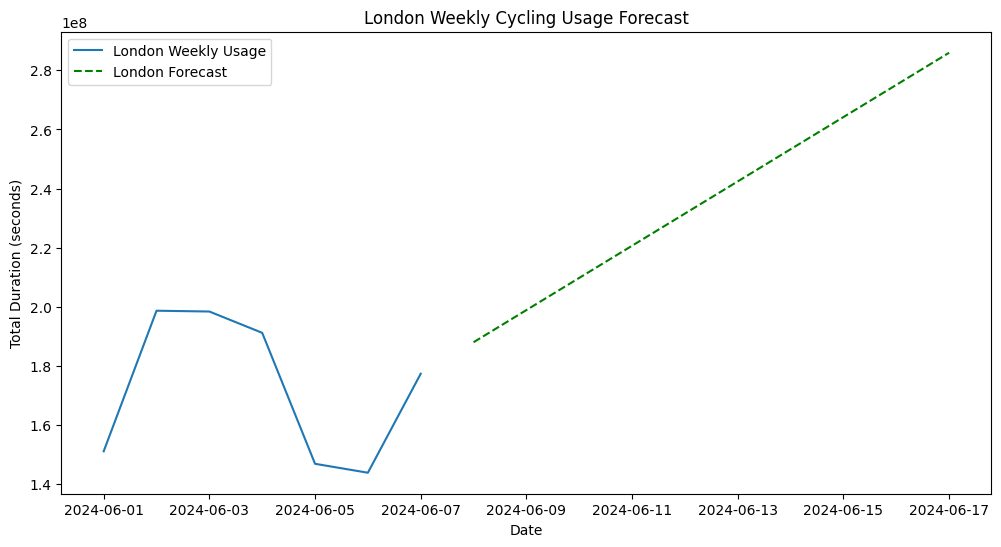

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(london_weekly_series, label="London Weekly Usage")
plt.plot(london_forecast, label="London Forecast", linestyle="--", color="green")
plt.title("London Weekly Cycling Usage Forecast")
plt.xlabel("Date")
plt.ylabel("Total Duration (seconds)")
plt.legend()
plt.show()

## Sentiment Analysis: Placeholder for text data

In [39]:
reviews_df = pd.DataFrame({
    'review_text': [
        "Cycling in Dublin is fantastic! Great bike lanes and easy rentals.",
        "The experience in London was good, but traffic made it less enjoyable.",
        "Dublin cycling infrastructure could be improved for safety.",
        "London bikes are reliable, but the app is hard to use.",
        "I love the cycling culture in Dublin!"
    ]
})

# Performing sentiment analysis
reviews_df['polarity'] = reviews_df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_df['subjectivity'] = reviews_df['review_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


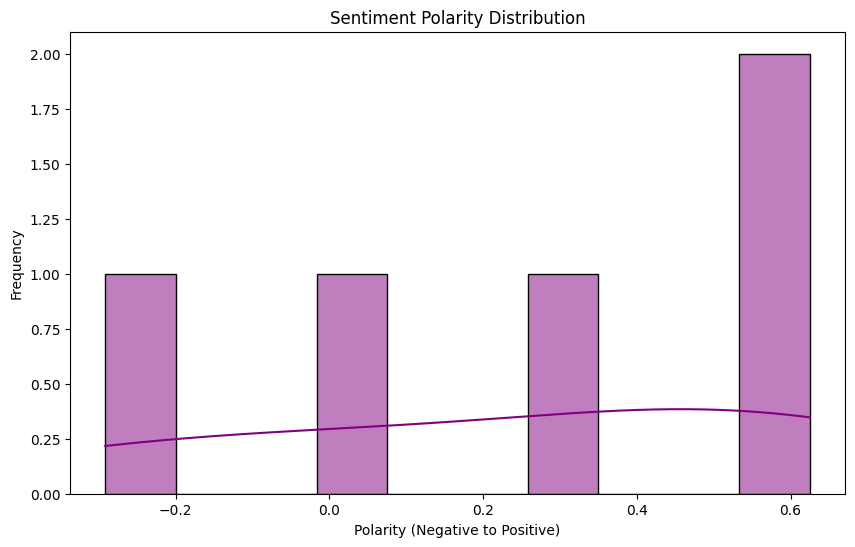

In [40]:
# Visualizing sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['polarity'], kde=True, color="purple", bins=10)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity (Negative to Positive)")
plt.ylabel("Frequency")
plt.show()

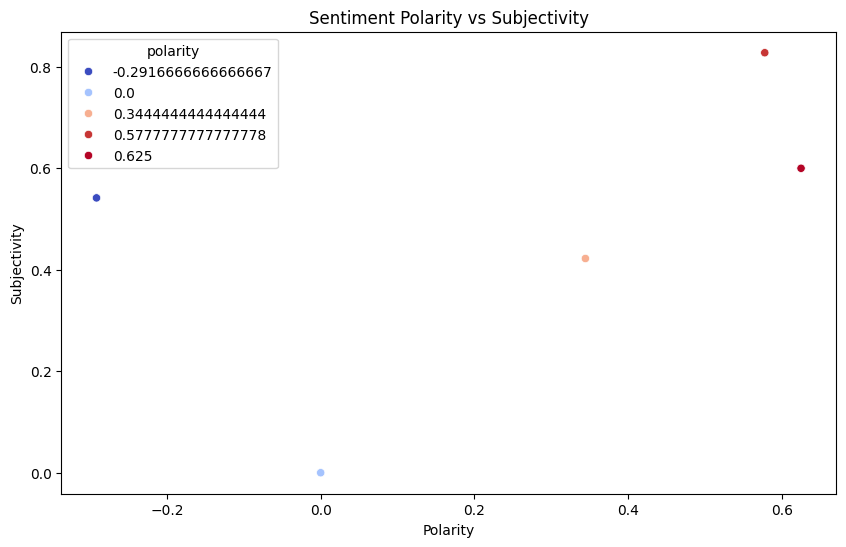

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reviews_df['polarity'], y=reviews_df['subjectivity'], hue=reviews_df['polarity'], palette="coolwarm")
plt.title("Sentiment Polarity vs Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

## Classification Task: Predicting whether a user is a member or casual based on ride features for Dublin

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, silhouette_score

In [43]:
# Selecting relevant features for classification
features_df1 = ['rideable_type', 'duration_sec', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'weekday']
target_df1 = 'member_casual'

# Encoding categorical variables
le_member_casual = LabelEncoder()
df1_clean[target_df1] = le_member_casual.fit_transform(df1_clean[target_df1])
df1_clean['rideable_type'] = LabelEncoder().fit_transform(df1_clean['rideable_type'])
df1_clean['weekday'] = LabelEncoder().fit_transform(df1_clean['weekday'])

X_df1 = df1_clean[features_df1]
y_df1 = df1_clean[target_df1]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluating the classifier
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.26      0.37     45179
           1       0.82      0.95      0.88    154821

    accuracy                           0.80    200000
   macro avg       0.72      0.61      0.62    200000
weighted avg       0.77      0.80      0.76    200000



In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 11804  33375]
 [  7235 147586]]
Accuracy Score:
 0.79695


## Clustering Task: Identifying clusters of rides based on features such as duration and geographical data for London

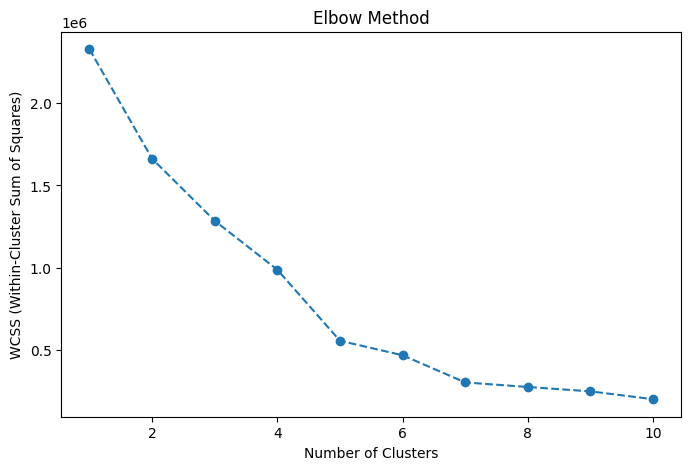

In [45]:
features_df3 = ['duration_sec', 'Start station number', 'End station number']

scaler = StandardScaler()
scaled_df3 = scaler.fit_transform(df3_clean[features_df3])

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df3)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [46]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Applying KMeans clustering with optimal number of clusters
optimal_clusters = 4  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_df3)

# Adding cluster labels to the dataframe
df3_clean['cluster'] = clusters

# Evaluating clustering performance
calinski_harabasz = calinski_harabasz_score(scaled_df3, clusters)
davies_bouldin = davies_bouldin_score(scaled_df3, clusters)

print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

Calinski-Harabasz Index: 351978.05
Davies-Bouldin Index: 0.49


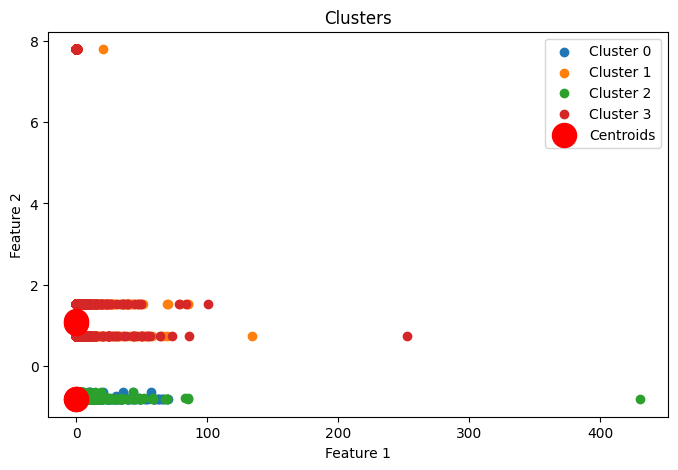

In [47]:
# Plotting clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    plt.scatter(scaled_df3[clusters == cluster, 0], scaled_df3[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [48]:
# Insights from clustering
print("Cluster counts:\n", df3_clean['cluster'].value_counts())


Cluster counts:
 cluster
0    306080
1    187467
3    142301
2    140679
Name: count, dtype: int64
